The key aspect of ride-hailing is the price. It relies on technology to collect accurate tracking data so that a fair price can be calculated at the end of the trip. Fortunately, our riders are quick to tell us when they overpaid and we can use that feedback to improve our product.

Please analyze the dataset to identify top opportunities for reducing the number of overcharge tickets and present your results. Please provide us with a PDF file/document with the findings. Finally, you shouldn’t spend more than 8 hours on this analysis.

Variables in the file:

order_id_new, order_try_id_new - id of an order

calc_created- time when the order was created

metered_price, distance, duration- actual price, distance and duration of a ride

upfront_price- promised to the rider price, based on predicted duration (predicted_duration) and distance (predicted_distance)

distance - ride distance

duration - ride duration

gps_confidence- indicator for good GPS connection (1 - good one, 0 - bad one)

entered_by- who entered the address

b_state- state of a ride (finished implies that the ride was actually done)

dest_change_number- number of destination changes by a rider

predicted distance - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car

predicted duration - predicted duration of a ride based on the pickup and dropoff points entered by the rider requesting a car

prediction_price_type- internal variable for the type of prediction:

upfront, prediction - prediction happened before the ride

upfront_destination_changed - prediction happened after rider changed destination during the ride

change_reason_pricing - records due to whose action the price changed

ticket_id_new - id for customer support ticket

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv(r"D:\Data Analysis\DA Projects\taxi-test-case\Analytical_Task_2 (taxi startup).csv")

In [3]:
pd.set_option('display.max_columns', 50)

In [4]:
df.head()

,order_id_new,order_try_id_new,calc_created,metered_price,upfront_price,distance,duration,gps_confidence,entered_by,b_state,dest_change_number,prediction_price_type,predicted_distance,predicted_duration,change_reason_pricing,ticket_id_new,device_token,rider_app_version,order_state,order_try_state,driver_app_version,driver_device_uid_new,device_name,eu_indicator,overpaid_ride_ticket,fraud_score
0,22,22,2020-02-02 3:37:31,4.04,10.0,2839,700,1,client,finished,1,upfront,13384.0,1091.0,NaN,1376,NaN,CI.4.17,finished,finished,DA.4.37,1596,Xiaomi Redmi 6,1,0,-1383.0
1,618,618,2020-02-08 2:26:19,6.09,3.6,5698,493,1,client,finished,1,upfront,2286.0,360.0,NaN,2035,NaN,CA.5.43,finished,finished,DA.4.39,1578,Samsung SM-G965F,1,0,NaN
2,657,657,2020-02-08 11:50:35,4.32,3.5,4426,695,1,client,finished,1,upfront,4101.0,433.0,NaN,2222,NaN,CA.5.43,finished,finished,DA.4.37,951,Samsung SM-A530F,1,0,-166.0
3,313,313,2020-02-05 6:34:54,72871.72,NaN,49748,1400,0,client,finished,2,upfront_destination_changed,3017.0,600.0,client_destination_changed,1788,NaN,CA.5.23,finished,finished,DA.4.37,1587,TECNO-Y6,0,1,NaN
4,1176,1176,2020-02-13 17:31:24,20032.50,19500.0,10273,5067,1,client,finished,1,upfront,14236.0,2778.0,NaN,2710,NaN,CA.5.04,finished,finished,DA.4.37,433,Itel W5504,0,0,NaN


In [5]:
df.columns

Index(['order_id_new', 'order_try_id_new', 'calc_created', 'metered_price',
       'upfront_price', 'distance', 'duration', 'gps_confidence', 'entered_by',
       'b_state', 'dest_change_number', 'prediction_price_type',
       'predicted_distance', 'predicted_duration', 'change_reason_pricing',
       'ticket_id_new', 'device_token', 'rider_app_version', 'order_state',
       'order_try_state', 'driver_app_version', 'driver_device_uid_new',
       'device_name', 'eu_indicator', 'overpaid_ride_ticket', 'fraud_score'],
      dtype='object')

In [6]:
df.dtypes

order_id_new               int64
order_try_id_new           int64
calc_created              object
metered_price            float64
upfront_price            float64
distance                   int64
duration                   int64
gps_confidence             int64
entered_by                object
b_state                   object
dest_change_number         int64
prediction_price_type     object
predicted_distance       float64
predicted_duration       float64
change_reason_pricing     object
ticket_id_new              int64
device_token             float64
rider_app_version         object
order_state               object
order_try_state           object
driver_app_version        object
driver_device_uid_new      int64
device_name               object
eu_indicator               int64
overpaid_ride_ticket       int64
fraud_score              float64
dtype: object

In [7]:
df.isna().mean()

order_id_new             0.000000
order_try_id_new         0.000000
calc_created             0.000000
metered_price            0.004046
upfront_price            0.310338
distance                 0.000000
duration                 0.000000
gps_confidence           0.000000
entered_by               0.000000
b_state                  0.000000
dest_change_number       0.000000
prediction_price_type    0.004046
predicted_distance       0.004046
predicted_duration       0.004046
change_reason_pricing    0.939713
ticket_id_new            0.000000
device_token             1.000000
rider_app_version        0.003237
order_state              0.000000
order_try_state          0.000000
driver_app_version       0.000000
driver_device_uid_new    0.000000
device_name              0.000000
eu_indicator             0.000000
overpaid_ride_ticket     0.000000
fraud_score              0.558163
dtype: float64

In [8]:
df['overpaid_ride_ticket'].value_counts()

0    4606
1     337
Name: overpaid_ride_ticket, dtype: int64

In [9]:
df['entered_by'].value_counts()

client      4722
driver       216
reseller       5
Name: entered_by, dtype: int64

# Exploring Variables

## overpaid_ride_ticket

In [10]:
df['overpaid_ride_ticket'].isna().agg(['count','sum','mean'])

count    4943.0
sum         0.0
mean        0.0
Name: overpaid_ride_ticket, dtype: float64

In [11]:
df['overpaid_ride_ticket'].agg(['count','sum','mean'])

count    4943.000000
sum       337.000000
mean        0.068177
Name: overpaid_ride_ticket, dtype: float64

## metered_price

In [12]:
df['metered_price'].isna().agg(['count','sum','mean'])

count    4943.000000
sum        20.000000
mean        0.004046
Name: metered_price, dtype: float64

<Axes: >

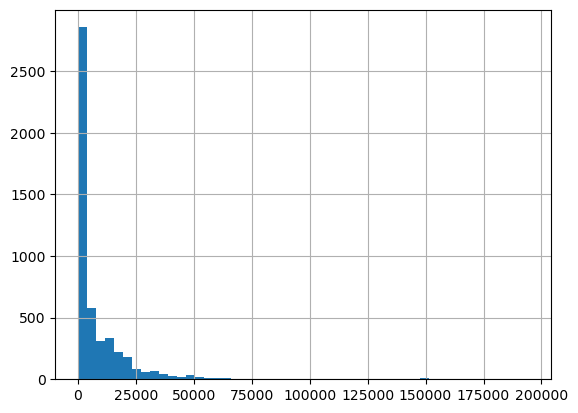

In [13]:
df['metered_price'].hist(bins=50)

In [14]:
df['metered_price_category'] = pd.qcut(df['metered_price'],5)

In [15]:
df['metered_price_category'].value_counts()

(8.25, 6000.0]          1291
(1.999, 4.72]            992
(13835.1, 194483.52]     985
(4.72, 8.25]             978
(6000.0, 13835.1]        677
Name: metered_price_category, dtype: int64

In [16]:
df.groupby('metered_price_category')['overpaid_ride_ticket'].agg(['count','sum','mean'])

,count,sum,mean
metered_price_category,,,
"(1.999, 4.72]",992,0,0.000000
"(4.72, 8.25]",978,5,0.005112
"(8.25, 6000.0]",1291,52,0.040279
"(6000.0, 13835.1]",677,94,0.138848
"(13835.1, 194483.52]",985,186,0.188832


Most overpaid rides are concentrated in the two highest metered_price categories.

In [17]:
df.groupby(['metered_price_category','gps_confidence'])['overpaid_ride_ticket'].agg(['count','sum','mean'])

count  sum      mean
metered_price_category gps_confidence                      
(1.999, 4.72]          0                  25    0  0.000000
                       1                 967    0  0.000000
(4.72, 8.25]           0                  36    1  0.027778
                       1                 942    4  0.004246
(8.25, 6000.0]         0                 163   14  0.085890
                       1                1128   38  0.033688
(6000.0, 13835.1]      0                 228   44  0.192982
                       1                 449   50  0.111359
(13835.1, 194483.52]   0                 531  142  0.267420
                       1                 454   44  0.096916

The share of overpaid rides is larger in the higher metered_price categories, even with good GPS.

## upfront_price

In [18]:
df['upfront_price'].isna().agg(['count','sum','mean'])

count    4943.000000
sum      1534.000000
mean        0.310338
Name: upfront_price, dtype: float64

In [19]:
df[(df['gps_confidence'] == 0) & (df['upfront_price'].isna() == True)].count()

order_id_new              613
order_try_id_new          613
calc_created              613
metered_price             611
upfront_price               0
distance                  613
duration                  613
gps_confidence            613
entered_by                613
b_state                   613
dest_change_number        613
prediction_price_type     611
predicted_distance        611
predicted_duration        611
change_reason_pricing      74
ticket_id_new             613
device_token                0
rider_app_version         611
order_state               613
order_try_state           613
driver_app_version        613
driver_device_uid_new     613
device_name               613
eu_indicator              613
overpaid_ride_ticket      613
fraud_score                47
metered_price_category    611
dtype: int64

In [20]:
df['upfront_price_category'] = pd.qcut(df['upfront_price'],5)

In [21]:
df['upfront_price_category'].value_counts()

(1.999, 3.8]          705
(3.8, 5.5]            693
(8.6, 7000.0]         691
(7000.0, 595000.0]    662
(5.5, 8.6]            658
Name: upfront_price_category, dtype: int64

In [22]:
df.groupby('upfront_price_category')['overpaid_ride_ticket'].agg(['count','sum','mean'])

,count,sum,mean
upfront_price_category,,,
"(1.999, 3.8]",705,1,0.001418
"(3.8, 5.5]",693,5,0.007215
"(5.5, 8.6]",658,2,0.003040
"(8.6, 7000.0]",691,25,0.036179
"(7000.0, 595000.0]",662,75,0.113293


Shunning NaNs, most overpaid rides are concentrated in the two highest upfront_price categories.

## dest_change_number

In [23]:
df['dest_change_number'].isna().agg(['count','sum','mean'])

count    4943.0
sum         0.0
mean        0.0
Name: dest_change_number, dtype: float64

In [24]:
df['dest_change_number'].value_counts()

1     4555
2      260
3       89
4       21
5       12
6        2
7        2
9        1
12       1
Name: dest_change_number, dtype: int64

In [25]:
df.groupby('dest_change_number')['overpaid_ride_ticket'].agg(['count','sum','mean'])

,count,sum,mean
dest_change_number,,,
1,4555,324,0.071131
2,260,11,0.042308
3,89,1,0.011236
4,21,0,0.000000
5,12,1,0.083333
6,2,0,0.000000
7,2,0,0.000000
9,1,0,0.000000
12,1,0,0.000000


I don't see 0 in dest_change_number, so I reckon 1 indicates the initial destination of the ride, meaning that the destination wasn't actually changed during the ride.

In [26]:
(df[df['dest_change_number'] == 1])['change_reason_pricing'].value_counts()

driver_waypoint_changed    6
Name: change_reason_pricing, dtype: int64

In [27]:
df['change_reason_pricing'].value_counts()

driver_destination_changed    150
client_destination_changed    142
driver_waypoint_changed         6
Name: change_reason_pricing, dtype: int64

*change_reason_pricing* stores info on due to whose action the price changed. When I look at rides with *dest_change_number* == 1, I see that the change of destination isn't listed as a factor of price change. Essentially, that proves the hypothesis that *dest_change_number* = 1 equals to not changing the destination.

To make it clear, NaNs in *change_reason_pricing* indicate that the price didn't change in the result of driver's or rider's actions.

In [28]:
df.groupby('change_reason_pricing')['overpaid_ride_ticket'].agg(['count','sum','mean'])

,count,sum,mean
change_reason_pricing,,,
client_destination_changed,142,12,0.084507
driver_destination_changed,150,0,0.000000
driver_waypoint_changed,6,0,0.000000


When the price changed in the result of driver's/rider's actions, the only overpriced rides are those where the rider changed the destination. However, the data are insufficient to make any significant conclusions.

## prediction_price_type

In [29]:
df['prediction_price_type'].isna().agg(['count','sum','mean'])

count    4943.000000
sum        20.000000
mean        0.004046
Name: prediction_price_type, dtype: float64

In [30]:
df['prediction_price_type'].value_counts()

upfront                        3432
prediction                     1279
upfront_destination_changed     208
upfront_waypoint_changed          4
Name: prediction_price_type, dtype: int64

In [31]:
df.groupby('prediction_price_type')['overpaid_ride_ticket'].agg(['count','sum','mean'])

,count,sum,mean
prediction_price_type,,,
prediction,1279,222,0.173573
upfront,3432,112,0.032634
upfront_destination_changed,208,3,0.014423
upfront_waypoint_changed,4,0,0.000000


The absolute majority of the overpaid rides are in *prediction* prediction_price_type.

## eu_indicator

In [32]:
df['eu_indicator'].isna().agg(['count','sum','mean'])

count    4943.0
sum         0.0
mean        0.0
Name: eu_indicator, dtype: float64

In [33]:
df['eu_indicator'].value_counts()

1    2770
0    2173
Name: eu_indicator, dtype: int64

In [34]:
df.groupby('eu_indicator')['overpaid_ride_ticket'].agg(['count','sum','mean'])

,count,sum,mean
eu_indicator,,,
0,2173,324,0.149103
1,2770,13,0.004693


The absolute majority of overpaid rides have 0 in eu_indicator. However, the data description doesn't contain any info on what this variable means. I could speculate that it indicates whether a rider is a citizen of a EU country, but I don't have any evidence to back it up. So I leave this insight as is.

In [35]:
df.groupby(['eu_indicator','gps_confidence'])['overpaid_ride_ticket'].agg(['count','sum','mean'])

count  sum      mean
eu_indicator gps_confidence                      
0            0                 858  197  0.229604
             1                1315  127  0.096578
1            0                 127    4  0.031496
             1                2643    9  0.003405

Anyway, eu_indicator alone doesn't tell much. Also, GPS confidence seems to be a more important factor than eu_indicator.

## gps_confidence

In [36]:
df['gps_confidence'].isna().agg(['count','sum','mean'])

count    4943.0
sum         0.0
mean        0.0
Name: gps_confidence, dtype: float64

In [37]:
df['gps_confidence'].value_counts()

1    3958
0     985
Name: gps_confidence, dtype: int64

In [38]:
df.groupby('gps_confidence')['overpaid_ride_ticket'].agg(['count','sum','mean'])

,count,sum,mean
gps_confidence,,,
0,985,201,0.204061
1,3958,136,0.034361


Nearly 60% of all overpaid rides have 0 in gps_confidence. Moreover, for rides with 0 in gps_confidence the percentage of overpaid rides is significantly higher (20% vs 3%).

0 in gps_confidence likely indicates that the GPS connection during the ride was bad, but the data description doesn't state whose connection was bad, driver's or rider's. I assume this is rider's connection.

This gives some food for thought:

 - bad GPS connection could result in bad distance prediction.
 - device type could be responsible for bad GPS connection.

## device_name

In [39]:
df['device_name'].isna().agg(['count','sum','mean'])

count    4943.0
sum         0.0
mean        0.0
Name: device_name, dtype: float64

In [40]:
df['device_name'].value_counts().head(30)

TECNO MOBILE LIMITED TECNO B1p    108
HMD Global Nokia 2.2               98
iPhone8,1                          91
TECNO F3                           86
HUAWEI MAR-LX1A                    73
Samsung SM-A505FN                  69
TECNO MOBILE LIMITED TECNO KA7     67
Samsung SM-A520F                   63
iPhone9,3                          62
Samsung SM-G960F                   61
TECNO-J8                           60
HUAWEI KOB-L09                     59
Samsung SM-G950F                   56
HUAWEI ANE-LX1                     55
Samsung SM-G930F                   55
TECNO K7                           51
Itel S12                           50
Samsung SM-A705FN                  49
Samsung SM-G965F                   49
Samsung SM-G935F                   47
Samsung SM-A105FN                  46
Samsung SM-A605FN                  45
iPhone7,2                          44
Xiaomi Redmi Note 7                43
Samsung SM-A530F                   43
Samsung SM-J610FN                  41
TECNO MOBILE

In [41]:
def device_sort(device_name):
    if 'tecno' in device_name.lower():
        return 'tecno'
    if 'nokia' in device_name.lower():
        return 'nokia'
    if 'iphone' in device_name.lower():
        return 'iphone'
    if 'huawei' in device_name.lower():
        return 'huawei'
    if 'samsung' in device_name.lower():
        return 'samsung'
    if 'xiaomi' in device_name.lower():
        return 'xiaomi'
    if 'itel' in device_name.lower():
        return 'itel'
    else:
        return 'misc'    

In [42]:
df['device_brand'] = df['device_name'].apply(device_sort)

In [43]:
df.groupby('device_brand')['overpaid_ride_ticket'].agg(['count','sum','mean']).sort_values(['mean'],
                                                                                                 ascending=False)

,count,sum,mean
device_brand,,,
tecno,933,156,0.167203
itel,120,16,0.133333
nokia,158,18,0.113924
misc,638,56,0.087774
samsung,1683,65,0.038622
iphone,426,9,0.021127
huawei,724,14,0.019337
xiaomi,261,3,0.011494


In [44]:
df.groupby('device_brand')['gps_confidence'].agg(['count','sum','mean']).sort_values(['mean'],
                                                                                     ascending=False)

,count,sum,mean
device_brand,,,
xiaomi,261,246,0.942529
huawei,724,671,0.926796
iphone,426,392,0.920188
samsung,1683,1485,0.882353
misc,638,458,0.717868
nokia,158,113,0.715190
itel,120,69,0.575000
tecno,933,524,0.561629


Evidently, the device brands that are responsible for most issues are simultaneiously the ones with lowest mean gps confidence.

In [45]:
df.groupby(['eu_indicator','device_brand','gps_confidence'])['overpaid_ride_ticket'].agg(['count','sum','mean'])

count  sum      mean
eu_indicator device_brand gps_confidence                      
0            huawei       0                  23    5  0.217391
                          1                  41    4  0.097561
             iphone       0                   9    2  0.222222
                          1                  51    7  0.137255
             itel         0                  51   12  0.235294
                          1                  68    4  0.058824
             misc         0                 168   31  0.184524
                          1                 257   23  0.089494
             nokia        0                  42   13  0.309524
                          1                  85    5  0.058824
             samsung      0                 146   33  0.226027
                          1                 278   28  0.100719
             tecno        0                 409  101  0.246944
                          1                 524   55  0.104962
             xiaomi       0                  10    0  0.000000
                          1                  11    1  0.090909
1            huawei       0                  30    2  0.066667
                          1                 630    3  0.004762
             iphone       0                  25    0  0.000000
                          1                 341    0  0.000000
             itel         1                   1    0  0.000000
             misc         0                  12    1  0.083333
                          1                 201    1  0.004975
             nokia        0                   3    0  0.000000
                          1                  28    0  0.000000
             samsung      0                  52    1  0.019231
                          1                1207    3  0.002486
             xiaomi       0                   5    0  0.000000
                          1                 235    2  0.008511

Everything seems to boil down to the quality of gps.

## rider_app_version, driver_app_version

In [46]:
df['rider_app_version'].isna().agg(['count','sum','mean'])

count    4943.000000
sum        16.000000
mean        0.003237
Name: rider_app_version, dtype: float64

In [47]:
df['rider_app_version'].value_counts()

CI.4.17    723
CI.4.19    624
CA.5.44    560
CA.5.43    406
CA.5.42    365
          ... 
CA.4.44      1
CI.3.81      1
CI.3.44      1
CI.3.62      1
CI.3.93      1
Name: rider_app_version, Length: 114, dtype: int64

In [48]:
df.groupby('rider_app_version')['overpaid_ride_ticket'].agg(['count','sum','mean']).sort_values(['count','mean'],
                                                                                                ascending=False).head(10)

,count,sum,mean
rider_app_version,,,
CI.4.17,723,30,0.041494
CI.4.19,624,30,0.048077
CA.5.44,560,50,0.089286
CA.5.43,406,19,0.046798
CA.5.42,365,24,0.065753
CI.4.18,272,17,0.062500
CA.5.46,238,8,0.033613
CA.5.45,213,16,0.075117
CA.5.36,187,18,0.096257


In [49]:
df.groupby('driver_app_version')['overpaid_ride_ticket'].agg(['count','sum','mean']).sort_values(['count','mean'],
                                                                                                 ascending=False).head(10)

,count,sum,mean
driver_app_version,,,
DA.4.39,1573,92,0.058487
DA.4.37,1003,55,0.054835
DA.4.42,807,53,0.065675
DA.4.34,288,24,0.083333
DA.4.31,282,31,0.109929
DA.4.41,233,19,0.081545
DI.3.34,112,4,0.035714
DI.3.33,107,0,0.000000
DI.3.36,104,3,0.028846


CA.5.44 app version has nearly a double overpriced ride rate than the other app versions with the comparable number of riders using it.

As for the driver's apps, numbers are issuficient to draw any insights.

In [50]:
def rider_app_sort(rider_app_version):
    if 'CA' in str(rider_app_version):
        return 'CA'
    if 'CI' in str(rider_app_version):
        return 'CI'
    else:
        return 'misc'    

In [51]:
df['rider_app_group'] = df['rider_app_version'].apply(rider_app_sort)

In [52]:
df.groupby('rider_app_group')['overpaid_ride_ticket'].agg(['count','sum','mean']).sort_values(['mean'],
                                                                                                 ascending=False)

,count,sum,mean
rider_app_group,,,
CA,2799,218,0.077885
CI,2128,119,0.055921
misc,16,0,0.000000


Given the app version numbers, presumably, CAs are the older versions of the rider's apps.

In [53]:
df.groupby(['device_brand', 'rider_app_group'])['overpaid_ride_ticket'].agg(['count','sum','mean']).sort_values(['mean'],
                                                                                                 ascending=False)

count  sum      mean
device_brand rider_app_group                      
tecno        CI                 274   60  0.218978
itel         CA                  88   14  0.159091
tecno        CA                 659   96  0.145675
nokia        CA                 106   14  0.132075
misc         CI                 251   23  0.091633
             CA                 384   33  0.085938
nokia        CI                  52    4  0.076923
itel         CI                  32    2  0.062500
samsung      CA                 873   43  0.049255
iphone       CA                 218    9  0.041284
samsung      CI                 804   22  0.027363
huawei       CA                 340    8  0.023529
xiaomi       CI                 127    2  0.015748
huawei       CI                 381    6  0.015748
xiaomi       CA                 131    1  0.007634
misc         misc                 3    0  0.000000
samsung      misc                 6    0  0.000000
iphone       misc                 1    0  0.000000
             CI                 207    0  0.000000
huawei       misc                 3    0  0.000000
xiaomi       misc                 3    0  0.000000

It looks that for most device brands CI versions of rider's apps perform better than CA versions in terms of the number of the overpaid rides.

Except for tecno, the brand with the worst performance in general in relation to this case.

For driver's app such an analysis isn't possible because drivers seem to be more eager to keep their driver's app updated.

## predicted_duration, duration

In [54]:
df['predicted_duration'].isna().agg(['count','sum','mean'])

count    4943.000000
sum        20.000000
mean        0.004046
Name: predicted_duration, dtype: float64

In [55]:
df['duration'].isna().agg(['count','sum','mean'])

count    4943.0
sum         0.0
mean        0.0
Name: duration, dtype: float64

In [56]:
df['dur_diff'] = df['predicted_duration'] - df['duration']

In [57]:
df['dur_diff_category'] = pd.qcut(df['dur_diff'],5)

In [58]:
df['dur_diff_category'].value_counts()

(-34.0, 122.0]          988
(-18086.001, -845.0]    987
(-845.0, -257.0]        985
(-257.0, -34.0]         984
(122.0, 20081.0]        979
Name: dur_diff_category, dtype: int64

In [59]:
df.groupby('dur_diff_category')['overpaid_ride_ticket'].agg(['count','sum','mean']).sort_values('mean',ascending=False)

,count,sum,mean
dur_diff_category,,,
"(-18086.001, -845.0]",987,118,0.119554
"(-845.0, -257.0]",985,89,0.090355
"(122.0, 20081.0]",979,69,0.070480
"(-34.0, 122.0]",988,33,0.033401
"(-257.0, -34.0]",984,28,0.028455


Expectedly, when the ride is **longer** (indicated by the minus sign) than expected , it's more likely to be deemed overpriced. 

Interestingly enough, **shorter** rides took the the third place. This likely indicates that some clients value precision over speed. ("I'm not paying this much for a 10-minute ride!")

In [60]:
df.groupby('dur_diff_category')['gps_confidence'].agg(['count','sum','mean']).sort_values('mean',ascending=False)

,count,sum,mean
dur_diff_category,,,
"(-34.0, 122.0]",988,920,0.931174
"(-257.0, -34.0]",984,889,0.903455
"(122.0, 20081.0]",979,802,0.819203
"(-845.0, -257.0]",985,787,0.798985
"(-18086.001, -845.0]",987,542,0.549139


The lower the gps confidence, the larger the ride duration misprediction.

In [61]:
df['duration_error_decimal'] = np.abs(df['dur_diff']) / df['duration']

In [62]:
df['duration_error_decimal'].agg(['mean','median'])

mean           inf
median    0.280515
Name: duration_error_decimal, dtype: float64

In [63]:
np.isinf(df['duration_error_decimal']).sum()

24

In [64]:
df['duration_error_decimal'].replace([np.inf, -np.inf], np.nan).agg(['mean','median'])

mean      3.195506
median    0.279104
Name: duration_error_decimal, dtype: float64

Median duration misprediction is 27.9%, meaning that the actual duration is off by 27.9% from the predicted duration.

In [65]:
df['duration_error_decimal'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [66]:
df['duration_error_decimal_bin'] = pd.qcut(df['duration_error_decimal'], 5)

In [67]:
df.groupby('duration_error_decimal_bin')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
duration_error_decimal_bin,,
"(-0.001, 0.0957]",980,0.039796
"(0.0957, 0.212]",980,0.055102
"(0.212, 0.359]",979,0.060266
"(0.359, 0.599]",980,0.105102
"(0.599, 1142.0]",980,0.082653


The greater the relative duration error, the greater the overpaid ride percentage.

## predicted_distance, distance

In [68]:
df['predicted_distance'].isna().agg(['count','sum','mean'])

count    4943.000000
sum        20.000000
mean        0.004046
Name: predicted_distance, dtype: float64

In [69]:
df = df.dropna(subset=['predicted_distance'])

In [70]:
df['distance'].isna().agg(['count','sum','mean'])

count    4923.0
sum         0.0
mean        0.0
Name: distance, dtype: float64

In [71]:
df['dist_diff'] = df['predicted_distance'] - df['distance']

In [72]:
df['dist_diff_category'] = pd.qcut(df['dist_diff'],5)

In [73]:
df['dist_diff_category'].value_counts()

(-581.4, 0.0]             1152
(-112012.001, -2466.0]     985
(754.8, 341860.0]          985
(-2466.0, -581.4]          984
(0.0, 754.8]               817
Name: dist_diff_category, dtype: int64

In [74]:
df.groupby('dist_diff_category')['overpaid_ride_ticket'].agg(['count','sum','mean']).sort_values('mean',ascending=False)

,count,sum,mean
dist_diff_category,,,
"(-112012.001, -2466.0]",985,140,0.142132
"(754.8, 341860.0]",985,71,0.072081
"(-581.4, 0.0]",1152,63,0.054688
"(0.0, 754.8]",817,30,0.036720
"(-2466.0, -581.4]",984,33,0.033537


Most overpaid rides were rides with actual distances noticeably longer than predicted distances. However, the percentages of overpaid rides in each of the distance difference groups shows that the relationship is not linear (probably due to the number of misprediction in short rides).

Why are there differences in these distances? Obviously, bad GPS could result in bad prediction.


In [75]:
df.groupby('dist_diff_category')['gps_confidence'].agg(['count','sum','mean']).sort_values('mean',ascending=False)

,count,sum,mean
dist_diff_category,,,
"(0.0, 754.8]",817,778,0.952264
"(-2466.0, -581.4]",984,885,0.899390
"(-581.4, 0.0]",1152,900,0.781250
"(754.8, 341860.0]",985,753,0.764467
"(-112012.001, -2466.0]",985,624,0.633503


Evidently, rides with the greatest distance mispredictions have the lowest gps confidence.

In [76]:
df['distance_error_decimal'] = np.abs(df['dist_diff']) / df['distance']

In [77]:
df['distance_error_decimal'].agg(['mean','median'])

mean           inf
median    0.169715
Name: distance_error_decimal, dtype: float64

In [78]:
np.isinf(df['distance_error_decimal']).sum()

63

In [79]:
df['distance_error_decimal'].replace([np.inf, -np.inf], np.nan).agg(['mean','median'])

mean      37.434295
median     0.163026
Name: distance_error_decimal, dtype: float64

Median distance misprediction is 16.3%, meaning that the actual distance is off by 16.3% from the predicted distance.

In [80]:
df['distance_error_decimal'].replace([np.inf, -np.inf], np.nan, inplace=True)

In [81]:
df['distance_error_decimal_bin'] = pd.qcut(df['distance_error_decimal'], 5)

In [82]:
df.groupby('distance_error_decimal_bin')['overpaid_ride_ticket'].agg(['count','mean'])

,count,mean
distance_error_decimal_bin,,
"(-0.001, 0.0249]",972,0.059671
"(0.0249, 0.0992]",974,0.036961
"(0.0992, 0.247]",970,0.048454
"(0.247, 0.522]",972,0.068930
"(0.522, 18784.0]",972,0.130658


In general, the greater the relative distance error, the greater the overpaid ride percentage.

But in the group with the smallest relative distance error, the overpaid ride percentage is also big. This might indicate that the duration prediction is off when the distance prediction is fine.

In [83]:
df[df['distance_error_decimal'] <= 0.0249].groupby('duration_error_decimal_bin')['overpaid_ride_ticket'].agg(['count','sum','mean'])

,count,sum,mean
duration_error_decimal_bin,,,
"(-0.001, 0.0957]",338,10,0.029586
"(0.0957, 0.212]",264,12,0.045455
"(0.212, 0.359]",164,9,0.054878
"(0.359, 0.599]",154,23,0.149351
"(0.599, 1142.0]",53,4,0.075472


Withing the group with the smallest distance error, the higher the duration error, the higher the overpaid ride percentage.

# Key Takeaways

- Misprediction in duration and distance seem to be the key factors in producing overpaid rides.
- Bad GPS is likely responsible for mispredictions. Nearly 60% of all overpaid rides had GPS issues. 20% of rides with bad GPS were overpaid whereas only 3% of rides with good GPS were overpaid.
- GPS quality is dependend on a smartphone brand. Xiaomi, Huawei, and iPhone showed over 90% GPS confidence; Itel and Tecno less than 60%.
- CA.5.44 version of the client app has nearly a double overpriced ride rate than the other versions.
- Almost all clients who considered a ride overpaid have eu_indicator = 0.

Even though *eu_indicator* has a strong relation to overpaid rides, it doesn't give too much food for thought. Assumably, non-EU residents have cheaper phones, which is evident by the indirect factors: lower number of iPhones and less GPS confidence in Samsung phones (a sign that cheaper models might be used).

Top opportunities for reducing the number of overpaid rides could be:
- Adjust the price prediction algorithm around potential GPS issues. For example, introduce/adjust some coefficients that account for a client's device brand/model. Or explore and fix the particular issues with those device models. Or maybe just introduce warnings that bad GPS connection could result in higher fares.
- Explore what's wrong with CA 5.44 client app and promote such clients to upgrade the app.